In [1]:
import gym

import gym_rf

# from gym_rf.envs.rf_env import MIMO
from scipy.constants import *
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import host_subplot

import matplotlib as mpl 

## agg backend is used to create plot as a .png file
#mpl.use('agg')

import matplotlib.pyplot as plt

from matplotlib import cm

import scipy.io

import random

from ast import literal_eval

import time

import pandas as pd

In [18]:
def play_one_episode(model, eps, gamma, alpha):
    observation = model.env.reset()
    done = False
    iters = 0
    totalreward = 0

    while (not done and iters < 601):
        action = model.sample_action(observation, eps)
        # print("action:{0}".format(action))
        prev_observation = observation

        observation, reward, done, info = model.env.step(action)
        #print("reward: {0}".format(reward))
        model.Q[prev_observation, action] += alpha*(reward + gamma*np.max(model.Q[observation, :])- model.Q[prev_observation, action])
        #if(model.env.observation_values[observation][0] == 58):
        #    print("final state is reached")
            
        totalreward += reward

        iters += 1
        if ((iters + 1) % 100) == 0:
            print("Play one episode: {0} iters are done".format(iters + 1))

    return totalreward




In [19]:
def Custom_Space_Mapping(actions):

    parameter_count = len(actions.keys())
    parameter_list = []
    for key in actions.keys():
        par_range = actions[key]#[actions.keys[i]]
        parameter_list.append(list(range(par_range[0],par_range[1]+1,par_range[2])))


    #creates a list of all possible tuples from given lists of action values
    action_val_tuples = [list(x) for x in np.array(np.meshgrid(*parameter_list)).T.reshape(-1,len(parameter_list))]
    action_key_list = list(np.arange(len(action_val_tuples)))

    action_values = dict(zip(action_key_list,action_val_tuples))
    #print("action_values: {0}".format(action_values))
    return action_values


In [20]:
class Model:
    def __init__(self, env):
        self.env = env
        self.Q = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        #for i in range(self.env.observation_space.n):
        #    for j in range(self.env.action_space.n):
        #        self.Q[i,j] = -1*alpha

    def sample_action(self, s, eps):
        if np.random.random() < eps:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.Q[s,:])


In [32]:
if __name__ == '__main__':
    env = gym.make('rf-v0')
    #xrange=100
    #xangle=40
    #env.set_distance(xrange,xangle)
    alpha = 0.3
    model = Model(env)
    gamma = 0.99
    
    Xrange = np.arange(100,1001,100)
    Xangle = np.arange(0,1,1)
    distance_pairs =[(xr,xa) for xr in Xrange for xa in Xangle]
    #mimo_ep_interval = 50
    mimo_ep_intervals=[150,150,150,150,150,150,150,150,150,150]
    N = np.sum(mimo_ep_intervals)
    
    rwd_list=[]
    rwds=[]
    eps=np.zeros(N)
    count=0
    for ndx in range(len(mimo_ep_intervals)):
        #change mimo model
        #if n % mimo_ep_interval == 0:
        #    ndx = int(n/mimo_ep_interval)
        model.env.set_distance(distance_pairs[ndx][0], distance_pairs[ndx][1])    
        print("Env distance set to ({0}, {1}), Index: {2}".format(distance_pairs[ndx][0], distance_pairs[ndx][1], ndx))
        
        for n in range(mimo_ep_intervals[ndx]):
            #eps[n] = 0.5*(1-(n % (mimo_ep_interval+1))/(mimo_ep_interval+1))#0.75*(1-n/N)#1.0 / np.sqrt(n + 1)
            
            eps[count] = 0.1#*(1-count/N)#0.3*(1-(n % (mimo_ep_intervals[ndx]+1))/(mimo_ep_intervals[ndx]+1))#0.75*(1-n/N)#1.0 / np.sqrt(n + 1)
            #state = env.reset()
            print("n: {0}, ndx: {1}, mimo_ep_interval: {2}".format(n, ndx, mimo_ep_intervals[ndx]))
            rwd = play_one_episode(model, eps[count], gamma, alpha)
            count+=1
            rwd_list.append(rwd)
        #if (len(rwd_list) % mimo_ep_interval) == 0:
        rwds.append(np.mean(rwd_list[-mimo_ep_intervals[ndx]: ]))
    #print(rwd_list)
    print("Score over time: {0}".format(sum(rwd_list) /N))

    print("Final Q-table: {0}".format(model.Q))
    
    Actions = model.env.Actions
    states = model.env.Observations
    action_values = Custom_Space_Mapping(Actions)
    state_values = Custom_Space_Mapping(states)
    rev_state_values = dict((v[0], k) for k, v in state_values.items())
    rev_action_values = dict((str(v), k) for k,v in action_values.items())
    
    file = open('Q_data.txt', 'w')
    for i in range(model.Q.shape[0]):
        for j in range(model.Q.shape[1]):
            file.write(str(model.Q[i,j])+ '\t'+ str([i,j]) + '\t' + str(state_values[i])  +'\t'+ str(action_values[j]) +'\n')
    file.close()
  

Env distance set to (100, 0), Index: 0
n: 0, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 1, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 2, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 3, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Pla

Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 32, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 33, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 34, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 35, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
P

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 64, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 65, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 66, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 67, ndx: 0, mimo_ep_interval: 150
P

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 96, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 97, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 98, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 127, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 128, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 129, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 130, ndx: 0, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are do

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 9, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 10, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 11, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 12, ndx: 1, mimo_ep_interval: 150
Pl

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 41, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 42, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 43, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n

Play one episode: 600 iters are done
n: 72, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 73, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 74, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 75, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
P

Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 104, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 105, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 106, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 107, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are do

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 136, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 137, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 138, ndx: 1, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are don

Play one episode: 600 iters are done
n: 17, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 18, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 19, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 20, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
P

Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 49, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 50, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 51, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 52, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
P

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 81, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 82, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 83, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 84, ndx: 2, mimo_ep_interval: 150
P

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 113, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 114, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 115, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 116, ndx: 2, mimo_ep_interval: 1

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 144, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 145, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 146, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 147, ndx: 2, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are do

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 26, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 27, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 28, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 29, ndx: 3, mimo_ep_interval: 150
P

n: 57, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 58, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 59, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 60, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
P

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 89, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 90, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 91, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 92, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
P

Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 121, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 122, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 123, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 124, ndx: 3, mimo_ep_interval: 150
Play one episode: 100 iters are do

Play one episode: 600 iters are done
n: 2, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 3, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 4, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 5, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play 

Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 34, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 35, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 36, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 37, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
P

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 66, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 67, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 68, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 69, ndx: 4, mimo_ep_interval: 150
P

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 98, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 99, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 100, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 101, ndx: 4, mimo_ep_interval: 150

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 130, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 131, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 132, ndx: 4, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are don

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 11, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 12, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 13, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 14, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
P

Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 43, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 44, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 45, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 46, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
P

n: 74, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 75, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 76, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 77, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
P

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 106, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 107, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 108, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 109, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are do

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 138, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 139, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 140, ndx: 5, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 141, ndx: 5, mimo_ep_interval: 1

Play one episode: 600 iters are done
n: 19, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 20, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 21, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 22, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
P

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 51, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 52, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 53, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 54, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
P

Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 83, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 84, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 85, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 86, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
P

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 115, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 116, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 117, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 118, ndx: 6, mimo_ep_interval: 1

Play one episode: 600 iters are done
n: 146, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 147, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 148, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 149, ndx: 6, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are do

Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 28, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 29, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 30, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 31, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
P

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 60, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 61, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 62, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 63, ndx: 7, mimo_ep_interval: 150
P

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 92, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 93, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 94, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 123, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 124, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 125, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 126, ndx: 7, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are do

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 5, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 6, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 7, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 8

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 37, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 38, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 39, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n

Play one episode: 600 iters are done
n: 68, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 69, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 70, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 71, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
P

Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 100, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 101, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 102, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 103, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are do

Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 132, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 133, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 134, ndx: 8, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 135, ndx: 8, mimo_ep_interval: 1

Play one episode: 600 iters are done
n: 13, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 14, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 15, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 16, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
P

Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 45, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 46, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 47, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 48, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
P

Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 77, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 78, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 79, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 80, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
P

Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 109, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 110, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 111, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are don

Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 140, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 141, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 142, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are done
Play one episode: 400 iters are done
Play one episode: 500 iters are done
Play one episode: 600 iters are done
n: 143, ndx: 9, mimo_ep_interval: 150
Play one episode: 100 iters are done
Play one episode: 200 iters are done
Play one episode: 300 iters are do

Average Cumulative Reward: 114.70593862369128


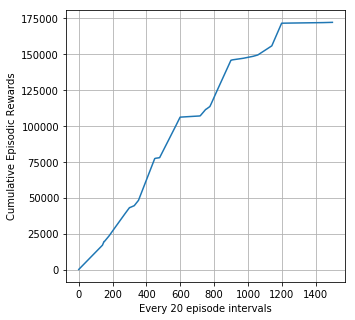

In [33]:
    
    fig = plt.figure(figsize=(5,5))#plt.figaspect(2.))
    #fig.suptitle('Q table learning plots')

    #First Graph - Episodic Rewards over the training time
    #ax = fig.add_subplot(4, 1, 1)
    print('Average Cumulative Reward: {0}'.format(np.array(rwds).mean()))
    #ax.plot(rwds)
    #ax.grid()
    #ax.set_ylabel('Episodic Rewards')
    plt.plot(np.cumsum(rwd_list))
    #plt.plot(rwds)
    plt.grid()
    plt.xlabel('Every 20 episode intervals')
    plt.ylabel('Cumulative Episodic Rewards')

    #print(rev_action_values)
    plt.show()
  

Action_values dimensions: 1521
State_values dimensions: 81
Q_values dimensions: (81, 1521)


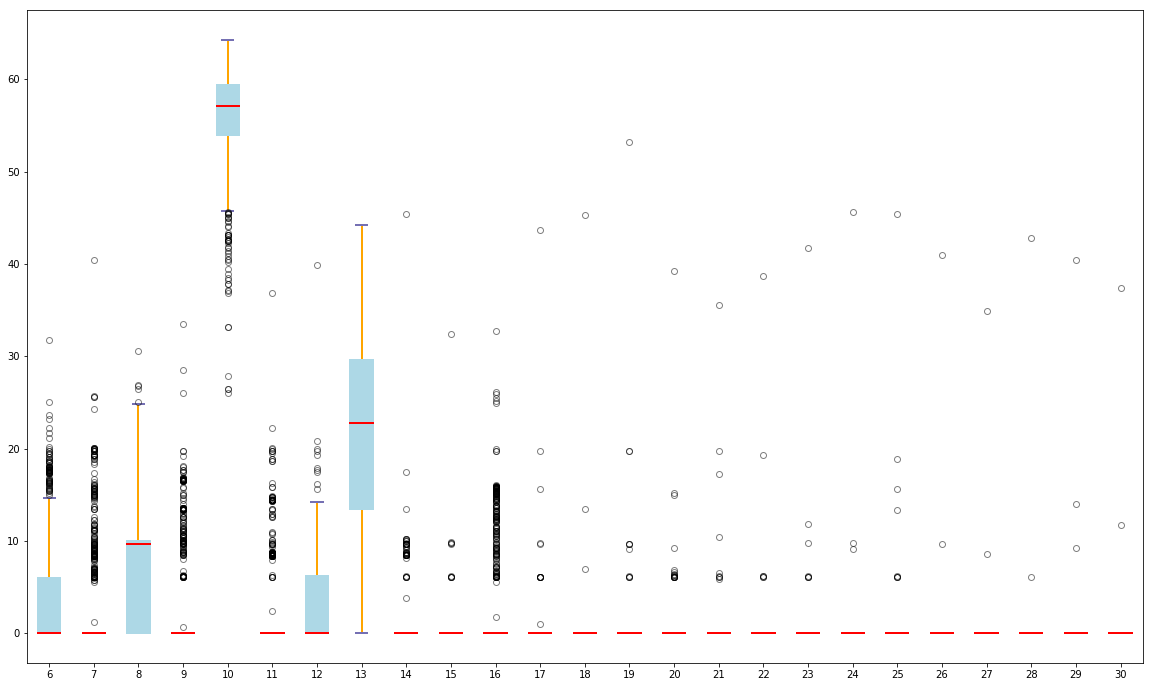

In [34]:
    #Second Graph 
    '''
        Plot the distribution of Q-values over states and actions
    '''
    '''
    action_values_list = action_values.keys()
    ax2 = fig.add_subplot(4, 1, 2)
    for n in range(model.Q.shape[0]):
        if np.max(model.Q[n, :]) > 0:
            ax2.plot(action_values_list, model.Q[n, :], label="n=%d" % (n,))
    ax2.grid()
    ax2.set_xlabel('actions')
    ax2.set_ylabel('Q values')
    '''
    fig = plt.figure(1, figsize=(20, 12))
    data_to_plot=[]
    labels=[]
    print("Action_values dimensions: {0}".format(len(action_values)))
    print("State_values dimensions: {0}".format(len(state_values)))
    print("Q_values dimensions: {0}".format(model.Q.shape))
    
    #Creating a Box plot
    for s in state_values.keys():
        if(s >55 and s < 101):
            data_to_plot.append(model.Q[s, :])
            labels.append(str(s-50))
    #ax2 = fig.add_subplot(111)
    bp = plt.boxplot(data_to_plot,  vert=True,  # vertical box alignment
                    patch_artist=True, labels=labels)  # fill with color)
    
    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='lightblue', linewidth=2)
        # change fill color
        #print(box)
        box.set_facecolor('lightblue' )
    
    
    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='orange', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='red', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    # Save the figure
    #fig.savefig('fig1.png', bbox_inches='tight')
    plt.show()
    
    
    


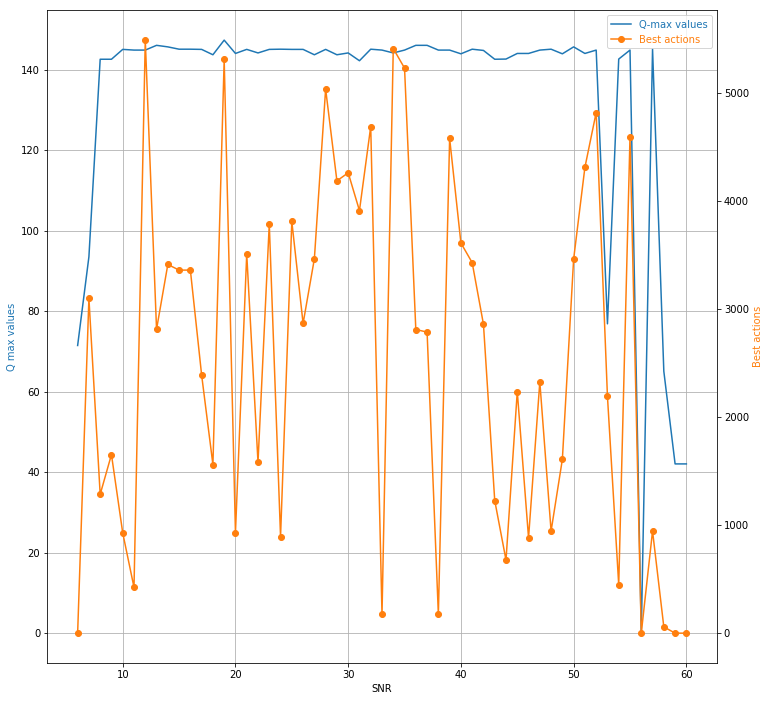

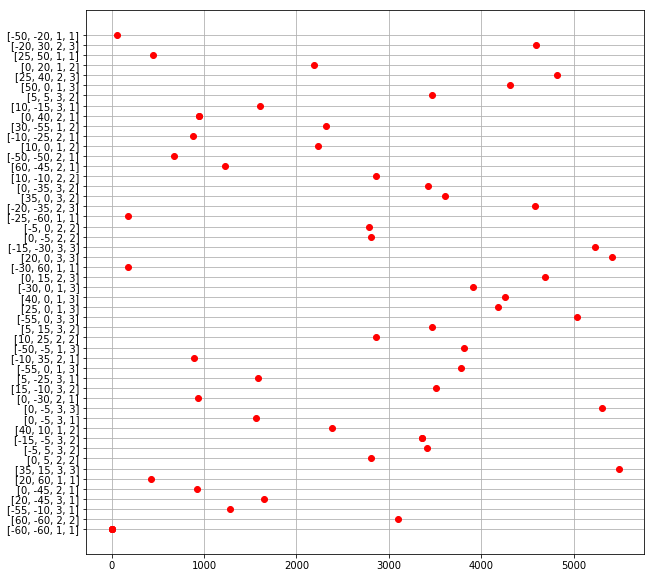

In [8]:
    #Plot max-Q values from each state and label it with its corresponding action
    max_Q_values = []
    best_action_values=[]
    snr=[]
    for s in state_values.keys():
        if s>55 and s<101:
            max_Q_values.append(np.max(model.Q[s, :]))
            best_action_values.append(np.argmax(model.Q[s, :]))
            snr.append(state_values[s])
    #print(str(action_values[best_action_values[0]]))
    #print(best_action_values)
    #fig = plt.figure(num="maxQ plot",figsize=(20, 12))
    #plt.plot(max_Q_values)
    #plt.plot(best_action_values)
    best_actions = [str(action_values[x]) for x in best_action_values]
    
    #plt.show()
    fig = plt.figure(num="maxQ plot",figsize=(12, 12))
    host = host_subplot(111, figure=fig)
    #host.set_aspect(1.)

    par = host.twinx()

    host.set_xlabel("SNR")
    host.set_ylabel("Q max values")
    par.set_ylabel("Best actions")

    p1, = host.plot(snr, max_Q_values, label="Q-max values")
    p2, = par.plot(snr, best_action_values, label="Best actions",marker='o')
    
    leg = plt.legend()

    host.yaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.yaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())
    
    plt.grid()
    
    fig2 = plt.figure(num="Action Mappings", figsize=(10,10))
    plt.plot(best_action_values, best_actions,'ro')
    plt.grid()
    plt.show()

initial SNR: -1, initial random action: (-30, 25, 1, 1)
Previous Obs: -1, action: 1502, action_values: [25, 5, 3, 3], Observation: 6, done: False
Previous Obs: 6, action: 0, action_values: [-30, -30, 1, 1], Observation: -1, done: False
Previous Obs: -1, action: 1502, action_values: [25, 5, 3, 3], Observation: 6, done: False
Previous Obs: 6, action: 0, action_values: [-30, -30, 1, 1], Observation: -1, done: False
Previous Obs: -1, action: 1502, action_values: [25, 5, 3, 3], Observation: 6, done: False
Previous Obs: 6, action: 0, action_values: [-30, -30, 1, 1], Observation: -1, done: False
Previous Obs: -1, action: 1502, action_values: [25, 5, 3, 3], Observation: 6, done: False
Previous Obs: 6, action: 0, action_values: [-30, -30, 1, 1], Observation: -1, done: False
Previous Obs: -1, action: 1502, action_values: [25, 5, 3, 3], Observation: 6, done: False
Previous Obs: 6, action: 0, action_values: [-30, -30, 1, 1], Observation: -1, done: False
Previous Obs: -1, action: 1502, action_value

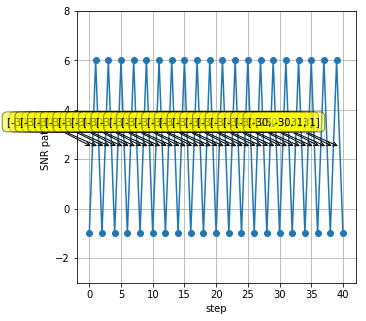

In [35]:
    fig = plt.figure(1, figsize=(5, 5))

    
    #transmitter posX, posY -> calc SNR with random (RBS, TBS, 1)
    
    #New MIMO model
    Xrange = 900
    Xangle = 0
    RBS,TBS = random.sample(np.arange(-60,61,5).tolist(),2)
    #define the mimo model based on the new location defined in test case
    action_val = (RBS,TBS,1,1)
    observation, action_val = model.env.test_reset(Xrange, Xangle, action_val)
    print("initial SNR: {0}, initial random action: {1}".format(state_values[observation][0], action_val))
    
    done = False
    count = 0

    SNR_path = [state_values[observation][0]]
    action_labels = []
    max_snr_state = rev_state_values[50]  # model.env.observation_space.n -1 #maximum state
    goal_range = [rev_state_values[x] for x in np.arange(30,50)]
    
    while ((observation < max_snr_state) and (count < 40)):
        predict = model.Q[observation] 
        # print('Final predict values: {0} '.format(predict.argmax()))
        action = np.argmax(predict)
        previous_observation = observation
        observation, reward, done, info = model.env.step(action)     
        print(
            "Previous Obs: {0}, action: {1}, action_values: {2}, Observation: {3}, done: {4}".format(state_values[previous_observation][0],
                                                                                 action, action_values[action],state_values[observation][0], done))
       
        #print(goal_range)
        SNR_path.append(state_values[observation][0])
        action_labels.append(str(action_values[action]))
        if(observation in goal_range):                                                                           
            break
        
        count += 1
    print(SNR_path)
    print(action_labels)
    
    #Calculate data Rate
    Tf = 2 #in msec
    rate, rateOpt = model.env.get_Rate(count,Tf)
    print("Rate: {0}, RateOpt: {1}".format(rate, rateOpt))
    # print(np.max(SNR_path))
    max_snr_state = 0
    #for s in range(model.Q.shape[0]):
    #    print("SNR: {0}, max-Q-value: {1}, best_action: {2}, action_values: {3}".format(state_values[s], np.max(model.Q[s,:]), np.argmax(model.Q[s,:]), action_values[np.argmax(model.Q[s,:])]))

    # print(max_snr_state)
    goal_state = rev_state_values[30]
    # print(state_values)
    # print(rev_state_values)
    #print(model.Q.shape)
    #print(np.max(model.Q[goal_state, :]))#, np.max(model.Q[180]))
    print("SNR 30 best action: {0}, action_value: {1}, SNR 30 Q-value: {2}".format(np.argmax(model.Q[goal_state, :]),
                                                                                   action_values[np.argmax(
                                                                                       model.Q[goal_state, :])],
                                                                                   np.max(model.Q[goal_state, :])))
    # print("Max state learnt: {0}, action: {1}, action_value: {2}, Q-value: {4}".format(state_values[max_snr_state], np.argmax(model.Q[max_snr_state, :]), action_values[np.argmax(model.Q[max_snr_state, :])], np.max(model.Q[max_snr_state,:])))

    #ax3 = fig.add_subplot(4, 1, 4)
    plt.plot(np.arange(len(SNR_path)), SNR_path, marker='o')
    for i in range(len(SNR_path)-1):
        x,y = (2*i+1)/2, (SNR_path[i]+SNR_path[i+1])/2
        plt.annotate(action_labels[i],xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.grid()
    plt.ylim(np.min(SNR_path)-2, np.max(SNR_path)+2)
    #ax3.set_xlabel('step')
    #ax3.set_ylabel('SNR path')
    plt.xlabel('step')
    plt.ylabel('SNR path')
    plt.show()

[22.23 18.83 15.29 10.1  10.17 13.19  8.17  7.16  9.93 22.53]


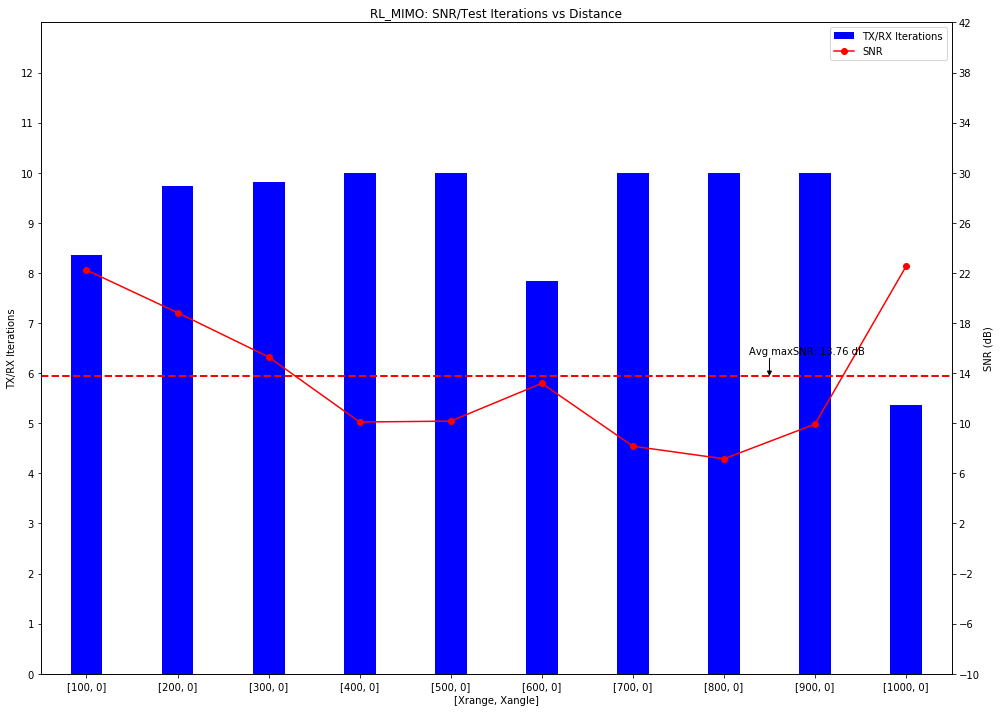

In [36]:
    total_maxSNR_values=[]
    total_dataRate_values=[]
    total_dataRateOpt_values=[]
    total_steps_count=[]
    for ndx in range(100):
        #Measuring Performance - CDF of steps vs Distance
        Xrange = np.arange(100,1001,100).tolist()
        Xangle = np.arange(0,1,1).tolist()
        steps_count = np.zeros([len(Xrange), len(Xangle)])
        Xaxis =[]
        maxSNR_labels=[]
        maxSNR_values=[]

        #Data Rate parameters
        Tf = 20
        dataRate= np.zeros([len(Xrange), len(Xangle)])
        dataRateOpt= np.zeros([len(Xrange), len(Xangle)])

        consumed_times=np.zeros([len(Xrange), len(Xangle)])
        for i in range(len(Xrange)):
            for j in range(len(Xangle)):
                then = time.time()
                RBS,TBS = random.sample(np.arange(-60,61,5).tolist(),2)
                action_val = (RBS,TBS,1,1)

                #define the mimo model based on the new location defined in test case
                observation, action_val = model.env.test_reset(Xrange[i], Xangle[j], action_val)
                #print("initial SNR: {0}, initial random action: {1}".format(state_values[observation][0], action_val))

                done = False
                count = 0

                SNR_path = [state_values[observation][0]]
                action_labels = []
                max_snr_state = rev_state_values[50]  # model.env.observation_space.n -1 #maximum state
                goal_range = [rev_state_values[x] for x in np.arange(25,50)]

                while ((observation < max_snr_state) and (count < 10)):
                    predict = model.Q[observation] 
                    action = np.argmax(predict)
                    previous_observation = observation
                    observation, reward, done, info = model.env.step(action)     

                    #add to the SNR path
                    SNR_path.append(state_values[observation][0])
                    action_labels.append(str(action_values[action]))
                    count += 1
                    if(observation in goal_range):                                                                           
                        break

                now=time.time()
                consumed_times[i,j] = (now-then)
                steps_count[i,j] = count

                #calculate data rate
                dataRate[i,j], dataRateOpt[i,j] = model.env.get_Rate(count, Tf)
                #print(opt_val, opt_val[0])
                #dataRateOpt[i,j] = opt_val[0][0]   

                maxSNR_labels.append(str(np.max(SNR_path)) + 'dB')
                maxSNR_values.append(np.max(SNR_path))
                Xaxis.append(str([Xrange[i],Xangle[j]]))
        total_maxSNR_values.append(maxSNR_values)
        total_dataRate_values.append(dataRate.ravel())
        total_dataRateOpt_values.append(dataRateOpt.ravel())
        total_steps_count.append(steps_count.ravel())
    
    #print(total_maxSNR_values)
    print(np.mean(total_maxSNR_values, axis=0))
    avg_maxSNR_values = np.mean(total_maxSNR_values, axis=0)
    avg_steps_count = np.mean(total_steps_count, axis=0)
    avg_dataRate_values = np.mean(total_dataRate_values, axis=0)
    avg_dataRateOpt_values = np.mean(total_dataRateOpt_values, axis=0)
    
    #Saving the results to csv
    res_data={}
    dist_data = [(i,j) for i in Xrange for j in Xangle]
    res_data['Xrange']= [x[0] for x in dist_data]
    res_data['Xangle']= [x[1] for x in dist_data]
    res_data['SNR']= avg_maxSNR_values
    res_data['Rate']= avg_dataRate_values#list(dataRate.ravel())
    res_data['RateOpt']= avg_dataRateOpt_values#list(dataRateOpt.ravel())
    
    df = pd.DataFrame(res_data, columns=['Xrange', 'Xangle', 'SNR', 'Rate', 'RateOpt'])
    df.to_csv('D:/Phd/literature_survey/RL_MIMO/RLMIMO_res.csv', index=False)
    
    
    '''
    Yaxis = np.cumsum(steps_count)
    print("StepsCount: {0}".format(steps_count.shape))
    print("Consumed Times; {0}".format(consumed_times))
    print("Max SNR labels: {0}".format(maxSNR_labels))
    #print("Yaxis: {0}".format(len(Yaxis)))
    #print("Xaxis: {0}".format(len(Xaxis)))
    fig = plt.figure(1, figsize=(20, 20))
    plt.plot(Xaxis,Yaxis, marker='o')
    
    for i in range(len(Yaxis)-1):
        x,y = (2*i+1)/2, (Yaxis[i]+Yaxis[i+1])/2
        plt.annotate(maxSNR_labels[i],xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    plt.grid()
    plt.ylim(np.min(Yaxis)-2, np.max(Yaxis)+2)
    plt.xlabel('(Xrange,Xangle)')
    plt.ylabel('CDF of step counts')
    
    plt.show()
    '''
    #print(steps_count.ravel())
    #print(Yaxis)
    fig = plt.figure(1, figsize=(14, 10))
    ax1 = plt.subplot(111)
    ind = np.arange(len(Xrange)*len(Xangle))
    bar_width = 0.35
    bar1 = ax1.bar(ind, avg_steps_count,width=bar_width,color='b', align='center')
    ax1.set_xticks(ind+bar_width/2)
    ax1.set_xticklabels(Xaxis)
    yticks = np.arange(0, np.max(avg_steps_count)+3, 1)
    ax1.set_yticks(yticks)
    ax1.set_ylabel('TX/RX Iterations')
    ax1.set_xlabel('[Xrange, Xangle]')
    ax1.autoscale(axis='x',tight=True)
    ax1.set_title('RL_MIMO: SNR/Test Iterations vs Distance')
    ax1.set_ylim([0,np.max(avg_steps_count)+3])
    ax1.set_xlim([np.min(ind)-0.5, np.max(ind)+0.5])
    
    ax2 = ax1.twinx()
    line_plot, = ax2.plot(Xaxis, avg_maxSNR_values, marker='o', color='red')
    yticks = np.arange(-10, 45, 4)
    ax2.set_yticks(yticks)
    ax2.set_ylabel('SNR (dB)')
    
    ax2.axhline(np.mean(avg_maxSNR_values), color='red', linewidth=2, linestyle='--')
    y0 = np.mean(avg_maxSNR_values)
    ax2.annotate('Avg maxSNR: {:0.2f} dB'.format(y0), xy=(len(ind)-2.5,y0), xytext=(-20,20),
            xycoords=('data', 'data'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
    
    plt.legend((bar1,line_plot), ('TX/RX Iterations', 'SNR'))
    fig.tight_layout()
    plt.show()

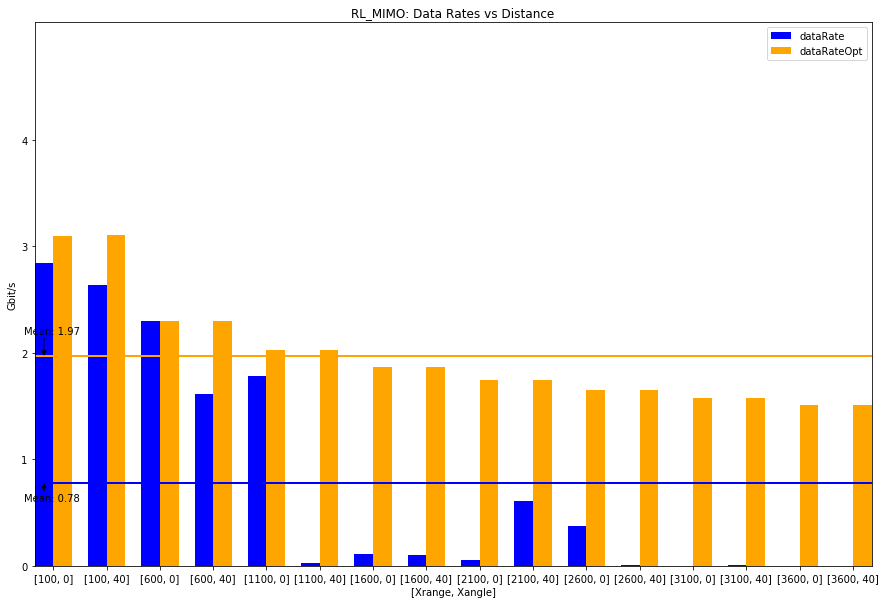

In [14]:
    #Plot Data Rate and Optimal Data Rates print(np.mean(dataRate.ravel()), np.mean(dataRateOpt.ravel()))
    fig = plt.figure(1, figsize=(15,10))
    ax = plt.subplot(111)
    ind = np.arange(len(Xrange)*len(Xangle))
    bar_width = 0.35
    bar1 = ax.bar(ind, dataRate.ravel(),width=bar_width,color='b', align='center')
    bar2 = ax.bar(ind+bar_width, dataRateOpt.ravel(),width=bar_width,color='orange', align='center')
    ax.set_xticks(ind+bar_width/2)
    ax.set_xticklabels(Xaxis)
    yticks = np.arange(0, np.max(dataRateOpt.ravel())+1, 1)
    ax.set_yticks(yticks)
    ax.set_ylabel('Gbit/s')
    ax.set_xlabel('[Xrange, Xangle]')
    ax.autoscale(axis='x',tight=True)
    ax.set_title('RL_MIMO: Data Rates vs Distance')
    ax.set_ylim([0,np.max(dataRateOpt.ravel())+2])
    ax.legend((bar1,bar2), ('dataRate', 'dataRateOpt'))
    
    
    ax.axhline(np.mean(dataRate.ravel()), color='blue', linewidth=2)
    ax.axhline(np.mean(dataRateOpt.ravel()), color='orange', linewidth=2)
    
    # Add arrows annotating the means:
    for dat, yoff in zip([dataRate.ravel(), dataRateOpt.ravel()], [-20, 20]):
        y0 = np.mean(dat)
        #align = 'left' if xoff > 0 else 'right'
        ax.annotate('Mean: {:0.2f}'.format(y0), xy=(0,y0), xytext=(-20,yoff),
                xycoords=('data', 'data'), textcoords='offset points',
                horizontalalignment='left', verticalalignment='bottom',
                arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                                connectionstyle='angle,angleA=0,angleB=90,rad=10'),
                )
    #plt.plot(Xaxis, dataRate.ravel(),'go', Xaxis, dataRateOpt.ravel(),'ro')
    plt.show()

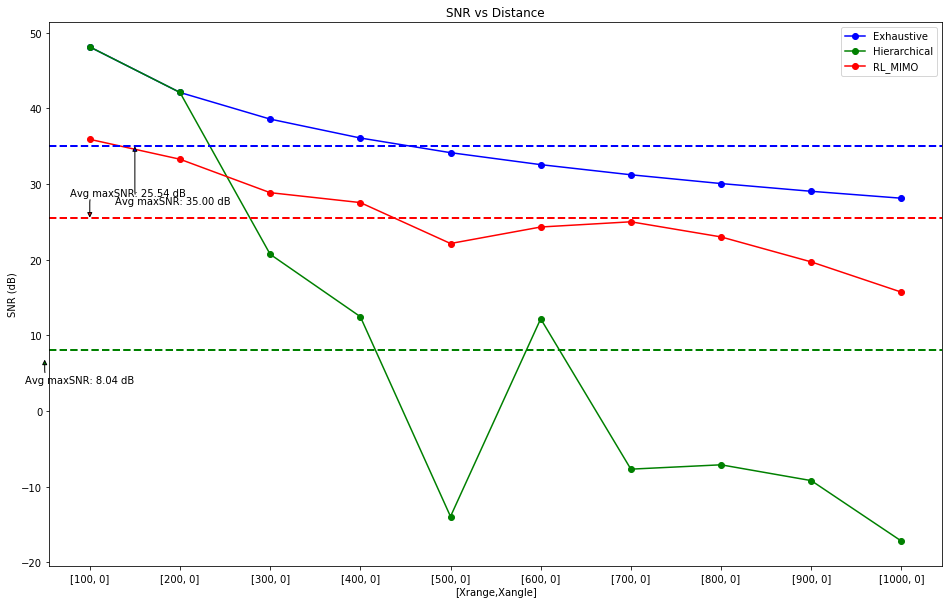

In [31]:
    #Plot SNR vs distance for exhaustive, hierarchical and RL_MIMO
    
    #exhaustive dataframe
    exh_df = pd.read_csv('D:/Phd/literature_survey/RL_MIMO/exhaustive_res.csv')
    
    #hierarchical dataframe
    hcal_df = pd.read_csv('D:/Phd/literature_survey/RL_MIMO/hierarchical_res.csv')
    
    #RLMIMO dataframe
    rlmimo_df = pd.read_csv('D:/Phd/literature_survey/RL_MIMO/RLMIMO_res.csv')
    
    rlmimo_bmark_df = pd.read_csv('D:/Phd/literature_survey/RL_MIMO/rlmimo_benchmark_res.csv')
    
    exh_df['Rate'] = abs(exh_df['Rate'])
    exh_df['RateOpt']= abs(exh_df['RateOpt'])
    #print(exh_df['Rate'], exh_df['RateOpt'])
    
    fig = plt.figure(1, figsize=(16,10))
    ax = plt.subplot(111)
    Xaxis = [str([i,j]) for i,j in zip(exh_df['Xrange'], exh_df['Xangle'])]

    ax.plot(Xaxis, exh_df['SNR'], 'b', Xaxis, hcal_df['SNR'], 'g', Xaxis, rlmimo_df['SNR'], 'r', marker='o')
    
    #For exh
    y0 = np.mean(exh_df['SNR'])
    ax.axhline(np.mean(y0), color='b', linewidth=2, linestyle='--') 
    ax.annotate('Avg maxSNR: {:0.2f} dB'.format(y0), xy=(0.5,y0), xytext=(-20,-50),
            xycoords=('data', 'data'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='top',
            arrowprops=dict(arrowstyle='-|>', fc='b', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
    
    #For hcal
    y0 = np.mean(hcal_df['SNR'])
    ax.axhline(np.mean(y0), color='g', linewidth=2, linestyle='--') 
    ax.annotate('Avg maxSNR: {:0.2f} dB'.format(y0), xy=(-.5,y0-1.25), xytext=(-20,-25),
            xycoords=('data', 'data'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-|>', fc='g', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )    
    #For rlmimo
    y0 = np.mean(rlmimo_df['SNR'])
    ax.axhline(np.mean(y0), color='r', linewidth=2, linestyle='--') 
    ax.annotate('Avg maxSNR: {:0.2f} dB'.format(y0), xy=(0,y0), xytext=(-20,20),
            xycoords=('data', 'data'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-|>', fc='r', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )    
    
    #plt.grid()
    #plt.ylim(np.min(Yaxis)-2, np.max(Yaxis)+2)
    ax.set_xlabel('[Xrange,Xangle]')
    ax.set_ylabel('SNR (dB)')
    ax.set_title('SNR vs Distance')
    ax.legend(['Exhaustive', 'Hierarchical', 'RL_MIMO'])
    plt.show()
 

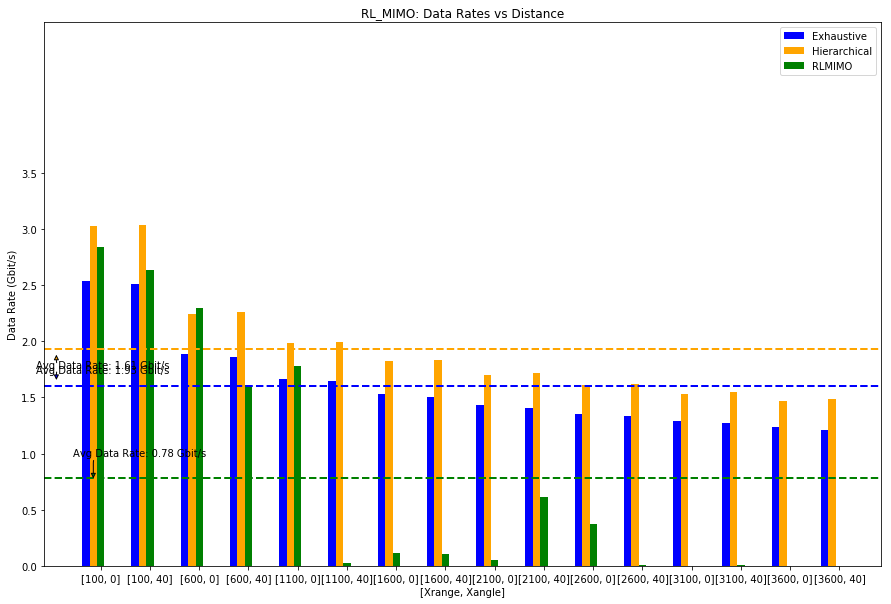

In [16]:
    #Plot effective rate vs distance for exhaustive, hierachical and RL_MIMO
    #Multi Set Chart
    
    #Plot Data Rate and Optimal Data Rates print(np.mean(dataRate.ravel()), np.mean(dataRateOpt.ravel()))
    fig = plt.figure(1, figsize=(15,10))
    ax = plt.subplot(111)
    ind = np.arange(len(Xrange)*len(Xangle))
    bar_width = 0.15
    bar1 = ax.bar(ind-bar_width, exh_df['Rate'],width=bar_width,color='blue', align='center')
    bar2 = ax.bar(ind, hcal_df['Rate'],width=bar_width,color='orange', align='center')
    bar3 = ax.bar(ind+bar_width, rlmimo_df['Rate'],width=bar_width,color='green', align='center')
    
    ax.set_xticks(ind+bar_width)
    ax.set_xticklabels(Xaxis)
    yticks = np.arange(0, np.max(rlmimo_df['Rate'])+1, 0.5)
    ax.set_yticks(yticks)
    ax.set_ylabel('Data Rate (Gbit/s)')
    ax.set_xlabel('[Xrange, Xangle]')
    #ax.autoscale(axis='x',tight=True)
    ax.set_title('RL_MIMO: Data Rates vs Distance')
    ax.set_ylim([0,np.max(rlmimo_df['Rate'])+2])
    ax.legend((bar1,bar2, bar3), ('Exhaustive', 'Hierarchical', 'RLMIMO'))
    
    
    #For exh
    y0 = np.mean(exh_df['Rate'])
    ax.axhline(np.mean(y0), color='b', linewidth=2, linestyle='--') 
    ax.annotate('Avg Data Rate: {:0.2f} Gbit/s'.format(y0), xy=(-0.75,y0+0.05), xytext=(-20,20),
            xycoords=('data', 'data'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='top',
            arrowprops=dict(arrowstyle='-|>', fc='b', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
    
    #For hcal
    y0 = np.mean(hcal_df['Rate'])
    ax.axhline(np.mean(y0), color='orange', linewidth=2, linestyle='--') 
    ax.annotate('Avg Data Rate: {:0.2f} Gbit/s'.format(y0), xy=(-0.75,y0-.05), xytext=(-20,-20),
            xycoords=('data', 'data'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-|>', fc='orange', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )    
    #For rlmimo
    y0 = np.mean(rlmimo_df['Rate'])
    ax.axhline(np.mean(y0), color='green', linewidth=2, linestyle='--') 
    ax.annotate('Avg Data Rate: {:0.2f} Gbit/s'.format(y0), xy=(0,y0), xytext=(-20,20),
            xycoords=('data', 'data'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-|>', fc='green', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )    
    
    plt.show()

SNR state calculated: 1
SNROpt: 64802.44709800907, RateOpt: 1.1431601555942636
SNR while calculating rate: 1241.107427963884
SNR state calculated: 9
SNROpt: 64803.18584906414, RateOpt: 1.1412432759181856
SNR while calculating rate: 22.24225961800173
SNR state calculated: 16
SNROpt: 64808.30543782068, RateOpt: 1.1479646569626853
SNR while calculating rate: 2246.9786434116186
SNR state calculated: 18
SNROpt: 64816.10594123871, RateOpt: 1.14126381079087
SNR while calculating rate: 8.02021739097481
SNR state calculated: 11
SNROpt: 64806.34570117789, RateOpt: 1.1498795881390227
SNR while calculating rate: 1340.269562889238
SNR state calculated: 9
SNROpt: 64810.66703136977, RateOpt: 1.1412551668219146
SNR while calculating rate: 186.86137140468898
SNR state calculated: 6
SNROpt: 64808.155086080864, RateOpt: 1.1412511743841873
SNR while calculating rate: 1.0121933369500977
SNR state calculated: 18
SNROpt: 64785.10770327093, RateOpt: 1.1412145360904913
SNR while calculating rate: 7.22308089515

SNROpt: 103.69706725019256, RateOpt: 0.4790995135203339
SNR while calculating rate: 0.0021117443513640893
SNR state calculated: -24
SNROpt: 103.69304813773026, RateOpt: 0.47909555915555774
SNR while calculating rate: 0.0013713602887008773
SNR state calculated: -14
SNROpt: 103.65617232523432, RateOpt: 0.47905927032266316
SNR while calculating rate: 0.03344441481632791
SNR state calculated: -10
SNROpt: 82.65618252297068, RateOpt: 0.4559889785614472
SNR while calculating rate: 0.015251294579725346
SNR state calculated: -10
SNROpt: 82.65712480747968, RateOpt: 0.4559901388187584
SNR while calculating rate: 0.7552355852354135
SNR state calculated: -14
SNROpt: 82.66365489517938, RateOpt: 0.45599817911186
SNR while calculating rate: 0.0737324441690631
SNR state calculated: -12
SNROpt: 82.67360451688604, RateOpt: 0.4560104285639582
SNR while calculating rate: 0.07944407893202042
SNR state calculated: -14
SNROpt: 82.66115523109416, RateOpt: 0.4559951014276532
SNR while calculating rate: 3.862130

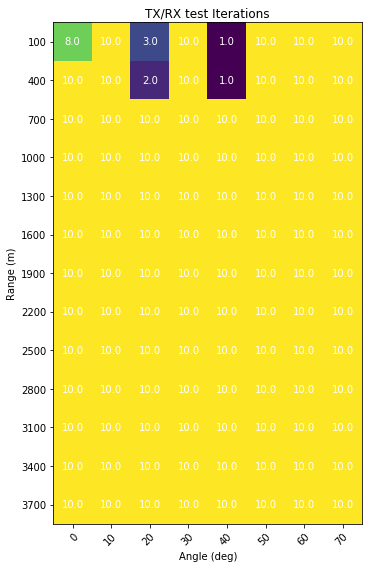

In [58]:
    #Heat map plot of number of test TX/RX iterations vs distance
        #Measuring Performance - CDF of steps vs Distance
    Xrange = np.arange(100,4000,300).tolist()
    Xangle = np.arange(0,80,10).tolist()
    steps_count = np.zeros([len(Xrange), len(Xangle)])
    Xaxis =[]
    maxSNR_labels=[]
    maxSNR_values=[]
    
    #Data Rate parameters
    Tf = 20
    dataRate= np.zeros([len(Xrange), len(Xangle)])
    dataRateOpt= np.zeros([len(Xrange), len(Xangle)])
    
    consumed_times=np.zeros([len(Xrange), len(Xangle)])
    for i in range(len(Xrange)):
        for j in range(len(Xangle)):
            then = time.time()
            RBS,TBS = random.sample(np.arange(-60,61,5).tolist(),2)
            action_val = (RBS,TBS,1,1)

            #define the mimo model based on the new location defined in test case
            observation, action_val = model.env.test_reset(Xrange[i], Xangle[j], action_val)
            #print("initial SNR: {0}, initial random action: {1}".format(state_values[observation][0], action_val))

            done = False
            count = 0

            SNR_path = [state_values[observation][0]]
            action_labels = []
            max_snr_state = rev_state_values[60]  # model.env.observation_space.n -1 #maximum state
            goal_range = [rev_state_values[x] for x in np.arange(30,60)]
            
            while ((observation < max_snr_state) and (count < 10)):
                predict = model.Q[observation] 
                action = np.argmax(predict)
                previous_observation = observation
                observation, reward, done, info = model.env.step(action)     

                #add to the SNR path
                SNR_path.append(state_values[observation][0])
                action_labels.append(str(action_values[action]))
                count += 1
                if(observation in goal_range):                                                                           
                    break
                
            now=time.time()
            consumed_times[i,j] = (now-then)
            steps_count[i,j] = int(count)
            
            #calculate data rate
            dataRate[i,j], dataRateOpt[i,j] = model.env.get_Rate(count, Tf)
            #print(opt_val, opt_val[0])
            #dataRateOpt[i,j] = opt_val[0][0]   
        
            maxSNR_labels.append(str(np.max(SNR_path)) + 'dB')
            maxSNR_values.append(np.max(SNR_path))
            Xaxis.append(str([Xrange[i],Xangle[j]]))
    
    #Heat map Plot for TX/RX iterations
    #steps_count_cumsum = np.cumsum(steps_count, dtype=int).reshape(len(Xrange), len(Xangle))
    print("Data Rate: {0}".format(dataRate))
    fig = plt.figure(1, figsize=(14,8))
    ax = plt.subplot(111)
    im = ax.imshow(steps_count)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(Xangle)))
    ax.set_yticks(np.arange(len(Xrange)))
    # ... and label them with the respective list entries
    ax.set_xticklabels([str(x) for x in Xangle])
    ax.set_yticklabels([str(x) for x in Xrange])
    ax.set_xlabel('Angle (deg)')
    ax.set_ylabel('Range (m)')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(Xrange)):
        for j in range(len(Xangle)):
            text = ax.text(j, i, steps_count[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("TX/RX test Iterations")
    fig.tight_layout()
    plt.show()

Steps Count: (13, 8)


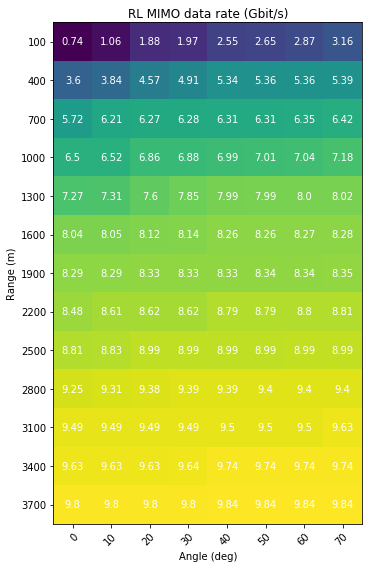

In [55]:
    #Heat map Plot for Data Rate over Distance
    data_rate_cumsum = np.cumsum(dataRate, dtype=float).reshape(len(Xrange), len(Xangle))
    print("Steps Count: {0}".format(data_rate_cumsum.shape))
    fig = plt.figure(1, figsize=(14,8))
    ax = plt.subplot(111)
    im = ax.imshow(data_rate_cumsum)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(Xangle)))
    ax.set_yticks(np.arange(len(Xrange)))
    # ... and label them with the respective list entries
    ax.set_xticklabels([str(x) for x in Xangle])
    ax.set_yticklabels([str(x) for x in Xrange])
    ax.set_xlabel('Angle (deg)')
    ax.set_ylabel('Range (m)')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(Xrange)):
        for j in range(len(Xangle)):
            text = ax.text(j, i, np.round(data_rate_cumsum[i, j],decimals=2),
                           ha="center", va="center", color="w")

    ax.set_title("RL MIMO data rate (Gbit/s)")
    fig.tight_layout()
    plt.show()

Steps Count: (13, 8)


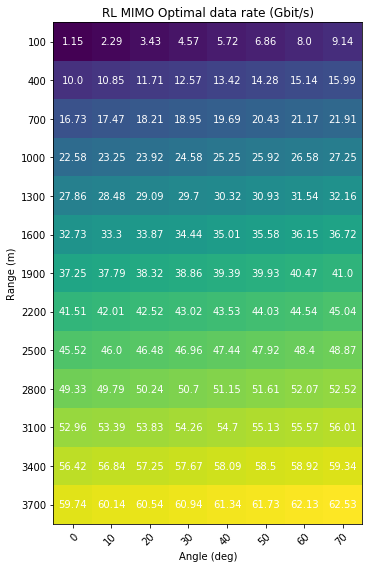

In [56]:
    #Heat map Plot for RLMIMO Optimal Data Rates over Distance
    data_rateOpt_cumsum = np.cumsum(dataRateOpt, dtype=float).reshape(len(Xrange), len(Xangle))
    print("Steps Count: {0}".format(data_rateOpt_cumsum.shape))
    fig = plt.figure(1, figsize=(14,8))
    ax = plt.subplot(111)
    im = ax.imshow(data_rateOpt_cumsum)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(Xangle)))
    ax.set_yticks(np.arange(len(Xrange)))
    # ... and label them with the respective list entries
    ax.set_xticklabels([str(x) for x in Xangle])
    ax.set_yticklabels([str(x) for x in Xrange])
    ax.set_xlabel('Angle (deg)')
    ax.set_ylabel('Range (m)')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(Xrange)):
        for j in range(len(Xangle)):
            text = ax.text(j, i, np.round(data_rateOpt_cumsum[i, j],decimals=2),
                           ha="center", va="center", color="w")

    ax.set_title("RL MIMO Optimal data rate (Gbit/s)")
    fig.tight_layout()
    plt.show()